In [1]:
%matplotlib inline

# 데이터의 기초 정보 

In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'C:/Users/Flora/datapython/data/drinks.csv'
drinks = pd.read_csv(file_path) #Dataframe 형태

In [3]:
print(drinks.info()) #비어 있는 파일이 보임

# 국가정보
# beer 소비량
# spirit 소비량
# wind 소비량
# 총 알코올 소비량
# 국가의 대륙 정보 - null값 있음(23개)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [4]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [5]:
drinks.describe() #피처의 수치적 정보

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# 인사이트의 발견 : 탐색과 시각화하기

피처간의 상관관계 살펴보기


1. 단순 상관 분석 방법 : 피처 1대1 (두 변수간의 선형적 관계)
2. 다중 상관 분석 : 피처 n개가 서로서로 어떤 관계가 있는가

// 상관분석 : 두 변수간의 선형적 관계를 상관계수로 표현하는 것
                공분산만으로 두 확률변수의 상관관계 구하면 단위크기에 영향
                ->> 값은 -1 ~ 1사이로 변환 (1에 가깝다면 양의 상관관계)

In [6]:
# 상관관계 살펴볼 대상은 beer, wine, spirit, pure alcohol임 (술의 종류만 다름)
# 두 피처가 얼마나 연관 ex) 키가 크면 몸무게가 많이 나간다 같은 느낌 얼마나 관계가 있는가

### 단순 상관관계 분석 방법 - pearson 방법 이용

#### 두 피처간의 상관관계

In [7]:
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


#### 여러 피처간의 상관관계

In [8]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson') #correlation
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


##### 시각화

In [9]:
!pip install seaborn

You should consider upgrading via the 'c:\users\flora\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


##### 1. heatmap

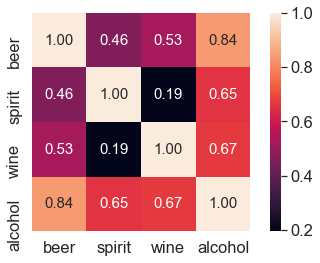

In [10]:
import seaborn as sns

cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, #위에서 계산한 행렬값을 넣음
                  cbar=True,
                  annot =True,
                  square = True,
                  fmt = '.2f',
                  annot_kws = {'size': 15},
                  yticklabels=cols_view,
                  xticklabels=cols_view)


plt.tight_layout()
plt.show()

##### 2. scatter plot

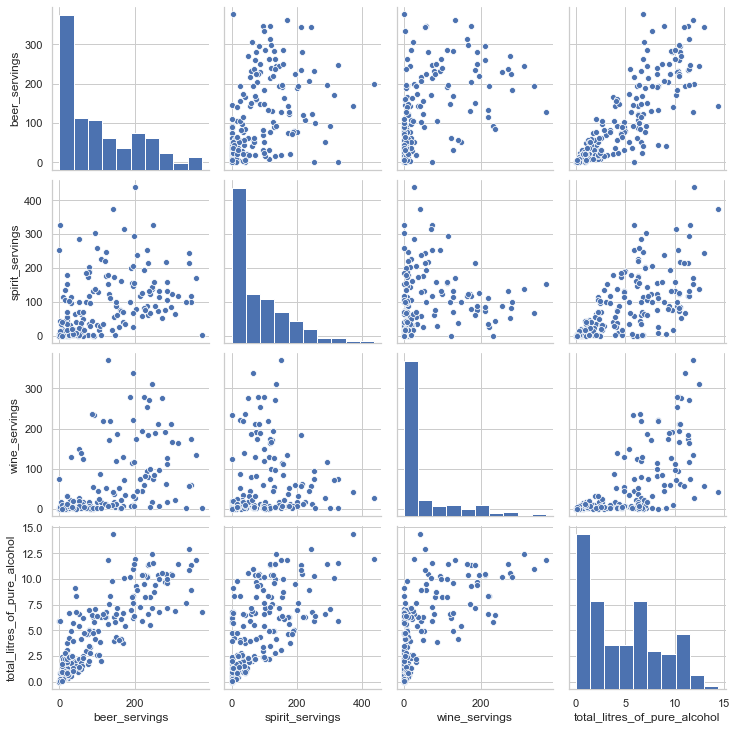

In [11]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', #데이터프레임에서 구하고싶은 값(대괄호 2번 써야 함)
                    'wine_servings', 'total_litres_of_pure_alcohol']], height = 2.5)

plt.show()

#  탐색적분석 : 개념적 탐색 분석하기

## 결측 데이터 전처리 - continent column 에 대한 결측 데이터 처리

#### 대륙에 대한 정보가 없는 국가를 others, ot라는 대륙으로 새롭게 정의 - fillna() 함수 이용

In [12]:
print(drinks.isnull().sum())
print("--------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
--------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [17]:
drinks['continent'] = drinks['continent'].fillna('OT')
#결측값을 OT로 채움

In [18]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [21]:
drinks['continent'].value_counts() 
# 어디에 몇개가 있는지 알 수 있지만 시각화가 제대로 안됨 -> 파이차트 이용

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

#### 파이차트 시각화 - plt.pie()

Text(0.5, 1.0, 'null data to "OT"')

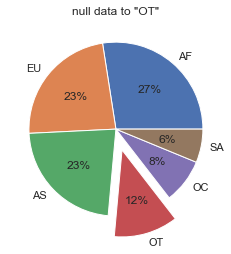

In [28]:
labels = drinks['continent'].value_counts().index.tolist() # 원 값의 이름
fracs1 = drinks['continent'].value_counts().values.tolist() #원 안의 값들
explode = (0, 0, 0, 0.25, 0, 0) #원에서 얼마만큼 벗어나는가

plt.pie(fracs1, explode = explode, labels = labels, autopct = '%.0f%%')
plt.title('null data to \"OT\"')

### applt, agg 함수를 통한 대륙별 분석

In [37]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

# agg : 여러 개의 함수를 여러 열에 적용

# 모든열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,…])
# 각 열마다 다른 함수를 매핑 : group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


### 전체 평균보다 많은 알코올을 섭취하는 대륙 구하기

In [33]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean] #overmean을 넘는것만
print(continent_over_mean)

# EU, OT, SA가 평균보다 술을 많이 마시는 대륙임

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [38]:
total_mean

4.717098445595855

### 평균 beer_servings가 가장 높은 대륙 

#### idxmax() 함수 적용 : 시리즈객체에서 값이 가장 큰 index를 반환

In [34]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent) #유럽이 제일 술 많이 마심^^

EU


### 시각화 -> bar plot

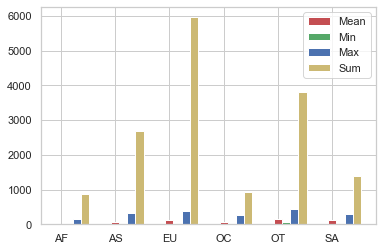

In [45]:
n_groups = len(result.index) #위에서 쓴 result 가져옴
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.15

rects1 = plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = 'Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color = 'b', label = 'Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color = 'y', label = 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

### 대륙별 total_litres_of_pure_alcohol

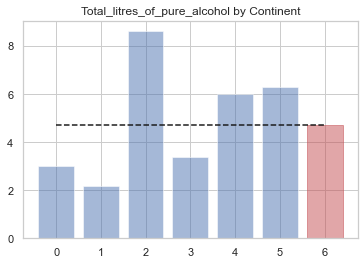

In [52]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents)-1].set_color('r') #마지막 바는 빨간색으로 하겠다
plt.plot([0., 6], [total_mean, total_mean], "k--") #점선을 그림
plt.title('Total_litres_of_pure_alcohol by Continent')

plt.show()

### 대륙별 beer_servings

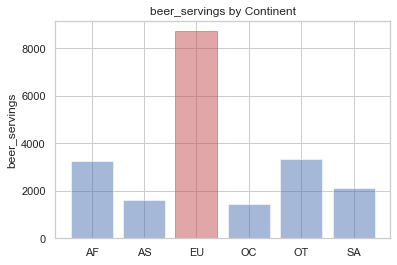

In [51]:
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[continents.index("EU")].set_color('r') #eu는 빨간색으로 하겠다
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

# 통계적 분석 : 분석 대상 간의 통계적 차이 검정

### 타당성 검증 -> t-test

    t-test : 두 집단간 평균의 차이에 대한 검정방법
    모집단의 평균 등과 같이 실제 정보를 모를 때 현재의 데이터만으로 
    두 집단의 차이에 대해 검정 가능
    
    두 집단의 데이터 개수가 비슷하면서 
    두 데이터가 정규분포를 보이는 경우에 신뢰도 높음
    
    scipy 라이브러리 이용
    

In [53]:
!pip install scipy

You should consider upgrading via the 'c:\users\flora\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [55]:
!c:\users\flora\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


### 아프리카와 유럽간의 맥주 소비량 차이 검정

In [60]:
# 아프리카와 유럽간의 맥주 소비량 차이 검정
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False) #분산이 같냐 안같냐

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

#t-statistic : t테스트의 검정 통계량
#p-value : 지금 나온 통계량이상이 또 나올 확률 -> 낮으면 가설이 일어날 확률 낮음 -> 기각하는게 좋음 // 기각할걸 예상
#          귀무 가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률(기준 : 0.05 or 0.01) //유의확률

#결론 : 아프리카와 유럽 대륙 간의 맥주 소비량 차이는 통계적으로 유의미하다

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


### 대한민국은 얼마나 독하게 술을 마시는 나라일까?

In [61]:
# alcohol rate 피처 생성
# total_litres_of_pure_alcohol 피처를 모든 술의 총 소비량으로 나눈 것
# alcohol_rate 는 sort_values()  함수를 사용하여 국가를 기준으로 정렬

In [63]:
#total_servings 피처 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피쳐 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보 생성
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by = ['alcohol_rate'], ascending=0) #내림차순
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


### 국가별 순위정보 시각화

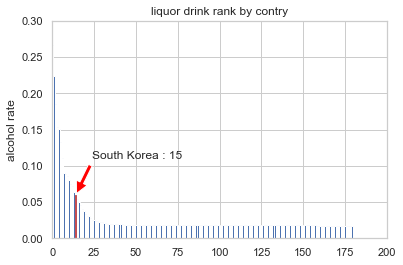

In [72]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1),
             xy = (korea_rank, korea_alc_rate),
             xytext = (korea_rank + 10, korea_alc_rate+0.05),
             arrowprops = dict(facecolor = 'red', shrink = 0.05))

plt.show()